<a href="https://colab.research.google.com/github/camilafaiza26/kelompok8_apm/blob/main/TB_K_Nearest_Neighbor_Camila_Faiza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#K-Nearest Neighbor
#import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [2]:
#Input Dataset
df = pd.read_csv('credit-card-fix.csv')
df.head()

,no_ktp,no_hp,age,pendidikan_terakhir,status_perkawinan,kepemilikan_tempat_tinggal,jenis_kelamin,waktu_kepemilikan_rumah,pendapatan_netto,jumlah_anak_dlm_tanggungan,...,total_mutasi_credit_12,total_mutasi_deb_3,total_mutasi_deb_6,total_mutasi_deb_12,financial_monthly_expense,financial_monthly_nett_income,score,grade,plafond,description
0,3.200000e+15,6.280000e+12,27,SMA,Menikah,MilikKeluarga,F,6/28/2016,11000000,0,...,0,10884000,10884000,0,4500000,8000000,55.1439,6.0,3700000.0,APPROVE
1,3.180000e+15,6.280000e+12,31,SMA,Menikah,MilikKeluarga,M,6/28/2016,75000,2,...,223720141,7184460,223685020,223685020,2000000,5500000,29.6065,8.0,0.0,REJECT
2,3.520000e+15,6.290000e+12,32,Diploma,JandaDuda,MilikSendiri,F,6/28/2016,10000000,0,...,0,0,0,0,1000000,5650000,20.1649,9.0,0.0,REJECT
3,3.670000e+15,6.280000e+12,30,SMA,Menikah,MilikKeluarga,F,6/28/2016,9900000,1,...,0,3323400,5161400,0,4000000,4900000,68.1796,5.0,4550000.0,APPROVE
4,1.200000e+15,6.280000e+12,21,SMA,BelumMenikah,MilikKeluarga,M,6/28/2016,5000000,1,...,0,15723500,44045056,0,1500000,4500000,55.5508,6.0,3700000.0,APPROVE


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
Le = LabelEncoder()

In [5]:
df['pendidikan_terakhir'] = Le.fit_transform(df['pendidikan_terakhir'])
df['kepemilikan_tempat_tinggal'] = Le.fit_transform(df['kepemilikan_tempat_tinggal'])
df['status_perkawinan'] = Le.fit_transform(df['status_perkawinan'])
df['jenis_kelamin'] = Le.fit_transform(df['jenis_kelamin'])
df['description'] = Le.fit_transform(df['description'])

In [6]:
# #menentukan variabel independen (feature)
x = df[ ['kepemilikan_tempat_tinggal','status_perkawinan','pendapatan_netto','jumlah_anak_dlm_tanggungan',
                 'freq_mutasi_credit_3',	'freq_mutasi_credit_6',	'freq_mutasi_credit_12','freq_mutasi_deb_3',
                 'freq_mutasi_deb_6','freq_mutasi_deb_12',
                 'total_mutasi_credit_3',
                 'total_mutasi_credit_6',
                 'total_mutasi_credit_12',
                 'total_mutasi_deb_3',
                 'total_mutasi_deb_6',
                 'total_mutasi_deb_12',
                 'financial_monthly_expense','financial_monthly_nett_income']]

# #menentukan variabel dependen (class)
y = df["description"]

In [7]:
# membagi dataset menjadi data train dan data test

# import package model selection dari Sklearn train_test_split untuk membagi data
from sklearn.model_selection import train_test_split

# membagi data dengan perbandingan data train dan data test 80%:20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [8]:
# lakukan standarisasi 
# (penskalaan pada data, karena range nilai data antar data feature terlalu jauh)

#mengaktifkan package sklearn.preprocessing untuk membantu melakukan standarisasi data
from sklearn.preprocessing import StandardScaler

#membuat objek standarisasi
standard_scaler = StandardScaler()

# fit digunakan untuk menghitung nilai rataan dan standar deviasi untuk digunakan saat proses scaling.
# transform untuk menerapkan nilai fit pada data
standard_scaler.fit(x_train)  # melakukan perhitungan nilai rataan dan standar deviasi pada data x_train

#menerapkan nilai rataan dan standar deviasi untuk penskalaan data x_train dan x_test
x_train = standard_scaler.transform(x_train)
x_test = standard_scaler.transform(x_test)

In [9]:
# K-Nearest Neighbor(KNN) untuk classifier data

# import library
from sklearn.neighbors import KNeighborsClassifier

#membuat objek fungsi kalsifikasi untuk KNN
#mengklasifikasikan x training dan y training menjadi 4, sehingga terdapat syntax n_neighbors=4
knn = KNeighborsClassifier(n_neighbors=15)
#memasukkan data train pada objek fungsi klasifikasi KNN
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [10]:
# Menentukan prediksi KKN dari data test (data aktual)
y_predict = knn.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 1, 1])

In [11]:
# melihat akurasi data hasil prediksi dengan data aktual
# classification_report digunakan untuk membuat report ttg metriks kalsifikasi
# confusion_matrix merupakan matriks untuk menghitung akurasi dari nilai prediksi dan aktual
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics #untuk perhitungan akurasi model

#menampilkan matriks hasil prediksi
print(confusion_matrix(y_test, y_predict))

#menampilkan report akurasi hasil prediksi
print(classification_report(y_test, y_predict))

#membuat summary akurasi model
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

[[4903  176]
 [ 911  316]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      5079
           1       0.64      0.26      0.37      1227

    accuracy                           0.83      6306
   macro avg       0.74      0.61      0.63      6306
weighted avg       0.80      0.83      0.80      6306

Accuracy: 0.8276244846178243


Text(0, 0.5, 'Mean Error')

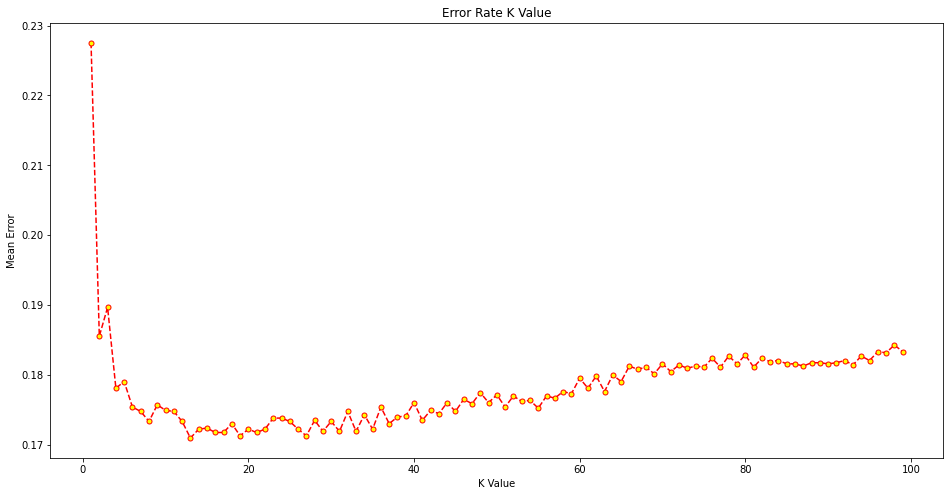

In [12]:
error = []
for i in range(1, 100): 
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(x_train, y_train)
    pred_i = classifier.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(16, 8)) 
plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o', markerfacecolor='yellow', markersize=5)
plt.title('Error Rate K Value') 
plt.xlabel('K Value') 
plt.ylabel('Mean Error')